# Mood Prediction


### Juan Diego Argüello Quan 

# Introducción 

La predicción del estado de ánimo de una persona es un problema muy complejo ya que es un fenómeno que puede depender de muchas variables. Pero al mismo tiempo esta predicción podría ser de gran utilidad en el campo clínico o educativo. Ahora, la creación de un modelo tiene ciertas dificultades y es por la misma razón que muchos intentos no han logrado tener una confiabilidad suficiente para aplicaciones en la vida real. 

El principal problema que tienen la mayoría de esos intentos es que no han sido capaces de mantener la individualización de cómo las variables afectan a cada individuo, o sea que cada variable que se use para crear el modelo predictivo afectará de forma diferente a cada persona. Por lo que el problema necesita de cierto modo crear un modelo diferente para cada persona.


## Justificación 

Este proyecto busca crear un modelo de aprendizaje automático para predecir el estado animico de una persona. El poder predecir el estado animico es una gran herramienta para evitar o corregir patrones de conducta que puedan ser perjudiciales para el indiciduo. De la misma forma, con este modelo predicitivo se podrian hacer evaluaciones más completas en el ambito de la salud mental y de esta forma hacer intervenciones y tratamientos más efectivos


## Atecedentes 


### Predicting Students Happines from physiology, phone, mobility, and behavioral data 

En este articulo se realizó un modelo de Machine Learning para predecir la felicidad de los estudiantes, los cuales fueron monitoreados en el transcurso de un mes. Se recolecto datos sobre sus señales fisiologicos, locación, información sobre los celulares y respuestas a encuestas enfocadas al comportamiento de los individuos. La clasificacion de feliciad fue binaria, "triste" con un valor de 0 y "feliz" con un valor de 1. En este articulo se utilizaron varios modelos de ML, entre los cuales estan **Vector Machines(SVM)**, **Random Forest (RF)**, **k-Nearest Neighbour**, **Logistic Regression** y **Neural Networks**. El mayor accuracy obtenido en esta investigación fue del 70.2% [1].


### Personalized machine learning of depressed mood using wearables

El objetivo principal de este estudio es desarrollar un enfoque personalizado para predecir el estado de ánimo "deprimido" o depresión utilizando diferentes tipos de datos y técnicas de aprendizaje automático. Utilizando evaluaciones ecológicas, neurocognición y datos de estilo de vida, se crearon modelos individuales de depresión para cada persona. Se encontró que no existe una estrategia única que funcione para todos, pero se identificó un enfoque combinado como el mejor en promedio. Se descubrieron características clave que influyen en la depresión para cada persona, como la ansiedad, el ejercicio, la dieta, el estrés y el rendimiento cognitivo. Estas características personalizadas pueden ser utilizadas para guiar un tratamiento multimodal y personalizado en el futuro. Con relación al presente proyecto es importante destacar de este articulo la aplicación de datos asociados al estilo de vida ya que esto va en la misma linea de lo que se propone a hacer en este trabajo [2].

### Predicting Tomorrows Mood, Health and Stress Level using Personalized Multitask Learning and Domaind Adaptation


El estudio se centra en construir un sistema de aprendizaje automático personalizado para predecir el estado de ánimo y el bienestar futuro utilizando datos recopilados de sensores portátiles y teléfonos inteligentes. Se utiliza una combinación de modelos de **redes neuronales profundas (DNN)** personalizadas utilizando el enfoque de **aprendizaje multitarea (MTL)** y modelos de **procesos gaussianos (GPs)** adaptados mediante la **adaptación de dominio (DA)**.

Se recopilan autoreportes diarios de estado de ánimo y bienestar durante un mes de 70 participantes, quienes también son monitoreados las 24 horas del día con sensores fisiológicos y una aplicación de teléfono inteligente. Estos datos, junto con información histórica sobre el clima, se utilizan para entrenar modelos personalizados de DNN utilizando MTL y modelos de GPs adaptados mediante DA.

Este enfoque personalizado permite desarrollar modelos que se ajustan a las características individuales de cada persona y, al mismo tiempo, se benefician de los datos agregados de la población en general. Esto ayuda a mejorar la precisión y confiabilidad de las predicciones del estado de ánimo y el bienestar futuro. Este enfoque de la personalización es una limitante en muchos estudios relacionados con la predicción del estado de ánimo [3]. 


### Mood Prediction Based on Calendar Events Using Multitask Learning

En este estudio, se aborda el desafío de predecir el estado de ánimo futuro utilizando información de eventos del calendario mediante técnicas de aprendizaje automático. A diferencia de estudios previos que se enfocan únicamente en el historial de estados de ánimo, este estudio propone un modelo de aprendizaje profundo que también considera los efectos de los eventos en el estado de ánimo. Se utiliza un extractor de características de eventos para capturar la influencia de los mismos en el estado de ánimo.

Para mejorar la precisión de la predicción, se implementa un enfoque de aprendizaje multitarea que considera tanto el estado de ánimo como los efectos de los eventos como variables objetivas. Los resultados demuestran que este enfoque logra una mayor precisión en comparación con los modelos de aprendizaje automático existentes [4].


## Descripción del problema 

El problema es la predicción del estado anímico de las personas, basándose con datos recolectables del estilo de vida y el uso del celular. La idea es que este modelo pueda realizarse con datos medianamente accesibles para las personas.  


## Objetivo

El objetivo es crear una solución es crear un modelo predictivo usando modelos de aprendizaje automático, basándose en la información de estilo de vida básicas como el sueño y el ejercicio, así como información extraíble de la actividad en celulares, como el tiempo de pantalla, el tiempo dedicado a redes sociales, etc.



## Algoritmos a utilizar

- Masquinas de Vectores de Soporte (SVM)

- Perceptrón Multicapa 

- Random Forest 



# Metodología 

A continuación se procede a cargar los datos, estudiarlos, limpiarlos y preprocesarlos. Luego se procede a crear los modelos y entrenarlos y por último a analizar sus rendimientos. Los datos se obtuvieron de Kaggle [5], es un dataset creado por una persona que registro ciertos dados propios y cada registro lo etiqueto con un estado de ánimo.  


# Fitness Trends Dataset

In [183]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
import seaborn as sns


### Carga de datos y estadísticas importantes

In [184]:
df_fit = pd.read_csv('Data/Fitness_trends.csv')
print("===================================")
print("Primeros cuatro registros")
print(df_fit.head(4))
print("===================================")
print("===================================")
print("Información de los datos")
print(df_fit.info())
print("===================================")
print("Descripción de los datos")
print(df_fit.describe())
print("===================================")


Primeros cuatro registros
         date  step_count  mood  calories_burned  hours_of_sleep  \
0  2017-10-06        5464   200              181               5   
1  2017-10-07        6041   100              197               8   
2  2017-10-08          25   100                0               5   
3  2017-10-09        5461   100              174               4   

   bool_of_active  weight_kg  
0               0         66  
1               0         66  
2               0         66  
3               0         66  
Información de los datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             96 non-null     object
 1   step_count       96 non-null     int64 
 2   mood             96 non-null     int64 
 3   calories_burned  96 non-null     int64 
 4   hours_of_sleep   96 non-null     int64 
 5   bool_of_active   96 non-null   

### Selección de características  

**De este dataset se procede a eliminar la columna "weight_kg" y "bool_of_active". Esto debido a que la variable weight es siempre la misma, por lo cúal no aporta al modelo. Bool of active se elimina por que es una variabel subjetiva del usuario, y solo quiere tener como variable subjetiva el target a predecir, que es el estado de ánimo**

In [185]:
df_fit = df_fit.drop('bool_of_active', axis=1)
df_fit = df_fit.drop('weight_kg', axis=1)
df_fit = df_fit.drop('date', axis=1)

**Se puede observar que existe un desbalanceo de los datos, hay más registros con la etiqueta 'Happy' (300) que con las otras. Esto puede llegar a ser un problema, debido a que el modelo tienda a clasificar mas esta clase debido al sesgo que existe.**

**Para evitar esto se realizó un balanceo de datos utilizando como técnica un sobremuestreo, esto debido a que como el dataset que se esta utilizando es relativamente pequeño, aplicar un submestreo podria llevar a un sobre ajuste del modelo, comprometiendo su capacidad preditiva**

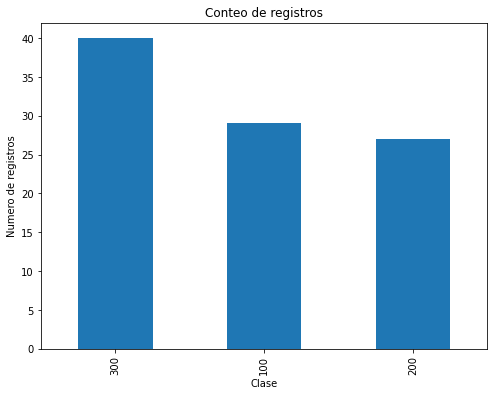

In [186]:
class_counts = df_fit['mood'].value_counts()

plt.figure(figsize=(8,6))
class_counts.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Numero de registros')
plt.title('Conteo de registros')
plt.show()

**Se verifica la existencia de datos nulos. Como no los hay no es necesario aplicar algun tipo de intervención como la imputación de datos**

In [188]:
print(df_fit.isnull().any().any())

False


**Se procede a escalar los datos para poder realizar el entrenamiento del modelo**

In [190]:
# Escalando los datos 

atr_continuos = ['step_count', 'calories_burned', 'hours_of_sleep']

scaler = MinMaxScaler()

df_fit[atr_continuos] = scaler.fit_transform(df_fit[atr_continuos])


print(df_fit.head(2))

df_fit.to_csv('Data/Fitness_trends_preprocessed.csv', index=False)


   step_count  mood  calories_burned  hours_of_sleep
0    0.735298   200         0.744856        0.428571
1    0.813303   100         0.810700        0.857143


In [191]:
def plot_confusion_matrix(y_test, predicted):    
    """
    Displays the confusion matrix and other metrics.
    
    Parameters:
      y_test : a list of test data. 
      predicted: a list of model results
    """
    classes = np.unique(y_test)
    
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, predicted)

    print("Accuracy:",  round(accuracy,2))
    print("Details:")
    print(metrics.classification_report(y_test, predicted))
    
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    plt.show()
    


In [210]:
# # Se dividen los atributos de la variable objetivo

# # Se cargan el dataset procesado
# df = pd.read_csv('Data/Fitness_trends_preprocessed.csv')

# # Se dividen los atributos de la variable objetivo
# X = df.drop('mood', axis=1)
# y = df['mood']

# # Se aplica el balanceo de los datos
# over_sampler = RandomOverSampler()
# X, y = over_sampler.fit_resample(X,y)


**Implementación del Perceptrón Multicapa**

Precisión del modelo: 0.46
Accuracy: 0.46
Details:
              precision    recall  f1-score   support

         100       0.43      0.50      0.46         6
         200       0.50      0.40      0.44        10
         300       0.44      0.50      0.47         8

    accuracy                           0.46        24
   macro avg       0.46      0.47      0.46        24
weighted avg       0.46      0.46      0.46        24



C:\Users\jdieg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


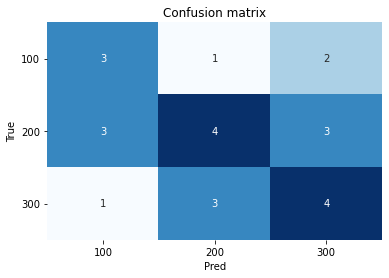

In [206]:
# Implementando un Perceptron Multicapa 


# Se cargan el dataset procesado
df = pd.read_csv('Data/Fitness_trends_preprocessed.csv')

# Se dividen los atributos de la variable objetivo
X = df.drop('mood', axis=1)
y = df['mood']

# Se aplica el balanceo de los datos
over_sampler = RandomOverSampler()
X, y = over_sampler.fit_resample(X,y)


# Division de conjuntos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando el modelo MLP 
model = MLPClassifier(activation='relu', hidden_layer_sizes=(50), random_state=42)

# Entrenando el modelo 
model.fit(X_train, y_train)

# Prediciendo 'Mood'
y_pred = model.predict(X_test)

# Calcular la prediccion 
mlp_accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(mlp_accuracy))

plot_confusion_matrix(y_test, y_pred)


**Implementación de un modelo SVM**

Precisión del modelo: 0.46
Accuracy: 0.46
Details:
              precision    recall  f1-score   support

         100       0.50      0.50      0.50         6
         200       0.46      0.60      0.52        10
         300       0.40      0.25      0.31         8

    accuracy                           0.46        24
   macro avg       0.45      0.45      0.44        24
weighted avg       0.45      0.46      0.44        24



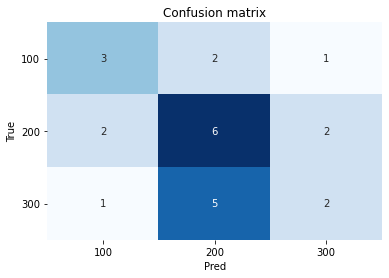

In [222]:
# Implementando SVM

# Se cargan el dataset procesado
df = pd.read_csv('Data/Fitness_trends_preprocessed.csv')

# Se dividen los atributos de la variable objetivo
X = df.drop('mood', axis=1)
y = df['mood']

# Se aplica el balanceo de los datos
over_sampler = RandomOverSampler()
X, y = over_sampler.fit_resample(X,y)

# Division de conjuntos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear el modelo SVM
model = SVC(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(accuracy))

plot_confusion_matrix(y_test, y_pred)


**Implementación del Random Forest**

Precisión del modelo: 0.67
Precisión promedio de la validación cruzada: 0.58
Accuracy: 0.67
Details:
              precision    recall  f1-score   support

         100       1.00      0.50      0.67         6
         200       0.60      0.90      0.72        10
         300       0.67      0.50      0.57         8

    accuracy                           0.67        24
   macro avg       0.76      0.63      0.65        24
weighted avg       0.72      0.67      0.66        24



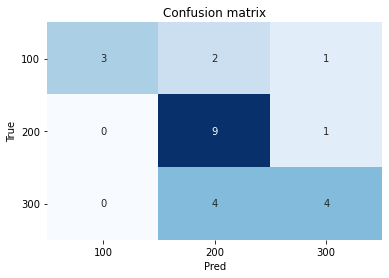

In [224]:
# Implementando un Random Forest 


# df = pd.read_csv('Data/Fitness_trends_preprocessed.csv')

# # Se dividen los atributos de la variable objetivo
# X = df.drop('mood', axis=1)
# y = df['mood']

# Se cargan el dataset procesado
df = pd.read_csv('Data/Fitness_trends_preprocessed.csv')

# Se dividen los atributos de la variable objetivo
X = df.drop('mood', axis=1)
y = df['mood']

# Se aplica el balanceo de los datos
over_sampler = RandomOverSampler()
X, y = over_sampler.fit_resample(X,y)

# Division de conjuntos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(accuracy))

cv_scores_rf = cross_val_score(model, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores_rf.mean()

print("Precisión promedio de la validación cruzada: {:.2f}".format(mean_cv_accuracy))


plot_confusion_matrix(y_test, y_pred)


# Resultados


### Perceptrón Multicapa 


A continuación se muestran los resultados finales del modelo Percetrón Multicapa

![Resultados MLP](Imagenes/Resultados_MLP.png)


Se puede observar que el modelo obtuvo una precisión del 46%, la cual es medianamente aceptable. Considerando las limitaciones que existen en el presente dataset. Se obtuvo que la clase **Neutral** (200) fue la que tuve mejor precisión con 50% las otras dos fueron muy parecidas con un 44% de precisión aproximadamente. 

Debido al balanceo de datos, se logro mejorar la precisión del modelo en 1%.



### Support Vector Machine (SVM)


A continuación se muestran los resultados finales del modelo SVM

![Resultados MLP](Imagenes/Resultados_SVM.png)

En general, este modelo muestra un rendimiento igualmente de limitado que el MLP con una precisión del 46%. En este caso la clase **Happy** fue la que mejor precisión con un 50%. Viendo la matriz de confusión se puede observa de forma gráfica como la clase **Neutral** fue la que más clasficiaciones correctas tuvo, sin embargo no fue la más precisa, debido a que en los datos de entrenamiento habian más registros de esta clase.


### Random Forest 


A continuación se muestran los resultados finales del modelo Random Forest

![Resultados MLP](Imagenes/Resultados_RF.png)

Por último, el modelo de Random Forest fue el que obtuvo mejor precisión con un 67%, es el unico que se puede considerar aceptable a la hora de predicir el estado de ánimo. En este la precisión de la clase **Happy** fue perfecta, aun que el recall muestra que solo se identificó correctamente la mitad de las muestras de esta clase. 

Tambien es importante mencionar que este modelo fue el que más se vio beneficiado con el balanceo de datos ya que paso de tener una precisión del 35% a 67%, una mejora de casi el doble. 



# Conclusiones 


- En general se obtuvieron modelos medianamente aceptables con precisiones aproximadamente del 45% con la excepción del Ranfom Forest con un 67%. Esto se debe en gran medida por las limitaciones del dataset con el que se trabajó. Además de que se tenían pocos datos para predecir el estado de ánimo. 

- Si se pudieran recolectar distintos tipos de datos haría que el modelo sea más robusto. También un monitoreo más extenso puede beneficiar a los modelos. En especial se considera que más variables acerca del estado físico de la persona pueda ayudar, más información sobre la actividad física, el sueño o la nutrición se recomienda implementar en futuras investigaciones.

- También es importante resaltar que este modelo se está realizando para un individuo en específico. Pensando en una real implementación de modelos predictivos en aplicaciones de la vida real, es importante contemplar las diferencias entre personas y como cada variable puede comportarse diferente. Por eso de cara a futuras implementaciones también se recomienda implementar algoritmos como el **Aprendizaje Multitarea (MTL)** y la **Adaptación de Dominio**


# Referencias 

[1] N. Jaques, S. Taylor, A. Azaria, A. Ghandeharioun, A. Sano and R. Picard, "Predicting students' happiness from physiology, phone, mobility, and behavioral data," 2015 International Conference on Affective Computing and Intelligent Interaction (ACII), Xi'an, China, 2015, pp. 222-228, doi: 10.1109/ACII.2015.7344575

[2] Shah, R.V., Grennan, G., Zafar-Khan, M. et al. Personalized machine learning of depressed mood using wearables. Transl Psychiatry 11, 338 (2021). https://doi.org/10.1038/s41398-021-01445-0

[3] Jaques, N., Taylor, S., Sano, A., & Picard, R. (2017, September). Predicting tomorrow’s mood, health, and stress level using personalized multitask learning and domain adaptation. In IJCAI 2017 Workshop on artificial intelligence in affective computing (pp. 17-33). PMLR.

[4] N. Tateyama, R. Fukui and S. Warisawa, "Mood Prediction Based on Calendar Events Using Multitask Learning," in IEEE Access, vol. 10, pp. 79747-79759, 2022, doi: 10.1109/ACCESS.2022.3193778.

[5] Fitness Trends Dataset. (2023). Consultado el 2 de junio 2023, extraído de https://www.kaggle.com/datasets/aroojanwarkhan/fitness-data-trends